In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.consignes{
  font-weight: bold;
  color: #3256a8;
  background-color: #edebdf
}
</style>
""")



# <div class=consignes>Deep Learning et traitement du signal TP 1 </div>
<div class=consignes> L'objectif de ce TP est de prendre en main les outils de modélisation et d'analyse du signal présentés dans le premier cours et d'introduire la problématique de <it>détection</it> dont on parlera dans le cours numéro 3 </div>
<div class=consignes>Deadline : 16 octobre 2024, 13h59, par mail à deepetsignal.mva@gmail.com <br> Effort estimé : 2 à 3 heures maximum</div>
<div class=consignes>Le rendu de ce TP n'est pas obligatoire. Il permet d'obtenir un bonus de 1 (minimum syndical) à 3 (votre notebook servira de correction l'an prochain) points sur la moyenne des TP </div>

<div class=consignes> Listez les noms des étudiants (2 au maximum) ayant participé à ce notebook dans la cellule suivante (prénom, nom).<br/>
Au moment du rendu, le notebook doit être nommé nom1_nom2_dlts_tp1.ipynb </div>

Naïl Khelifa
 
Quentin MOAYEDPOUR

<div class=consignes>Si vous installez des paquets supplémentaires, merci de les lister dans la cellule suivante avec la syntaxe
    
```
!pip install \< nom_du_paquet \>
```
    
</div>

In [3]:
import numpy as np 
import matplotlib.pylab as plt 
import scipy
import IPython.display as ipd

# **Partie 1 - Audio** 

## *Visualisation*

### **Question 0**

#### - Enregistrez un fichier wav de quelques secondes de votre voix. 
#### - Importez le avec scipy.io.wavfile.read et écoutez le dans le notebook avec IPython.display.Audio

In [4]:
from scipy.io import wavfile
from IPython.display import Audio

audio_path = './nail_4.wav'
audio_path_q = "./quentin.wav"

rate, data = wavfile.read(audio_path)
rate_q, data_q = wavfile.read(audio_path_q)

'''
- rate = Fréquence d'échantillonnage (en anglais, "sampling rate"). Elle représente le nombre d'échantillons par seconde dans le fichier audio.
- data = tableau 1D (notre fichiers audio mono).
'''

print("-"*50, "\nVoix de Nail :")
display(Audio(data, rate=rate))
print('-'*50, '\nVoix de Quentin:')
display(Audio(data_q, rate=rate_q))

-------------------------------------------------- 
Voix de Nail :


-------------------------------------------------- 
Voix de Quentin:


In [5]:
print(f"Fréquence d'échantillonnage voix de Nail: {rate}")
print(f"Fréquence d'échantillonnage voix de Quentin: {rate_q}")

Fréquence d'échantillonnage voix de Nail: 24000
Fréquence d'échantillonnage voix de Quentin: 48000


Une première chose qu'on remarque est que la fréquence d'échantillonnage est différente pour les 2 signaux, le premiers a été enregistré avec un micro d'ordinateur tandis que le second à l'aide d'un iphone et on remarque d'abord que l'enregistrement avec l'iphone a une plus haute fréquence d'échantillonnage et le son est de meilleure qualité

### **Question 2**
#### - Visualisez la forme d'onde temporelle de ce signal audio. 
#### - Estimez et affichez sa Densité Spectrale de Puissance. 
#### - Donnez une interprétation de ce que vous observez. 


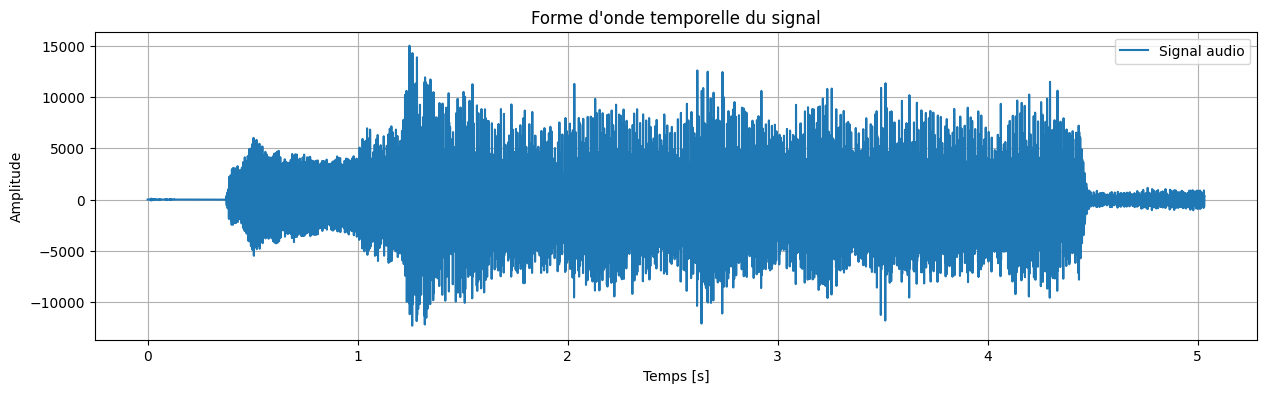

In [6]:
duration = len(data) / rate
time = np.linspace(0., duration, len(data))

plt.figure(figsize=(15, 4))
plt.plot(time, data, label="Signal audio")
plt.xlabel("Temps [s]")
plt.ylabel("Amplitude")
plt.title("Forme d'onde temporelle du signal")
plt.legend()
plt.grid()
plt.show()

Pour estimer la densité spectrale de puissance du signal, on utilise la méthode Welch

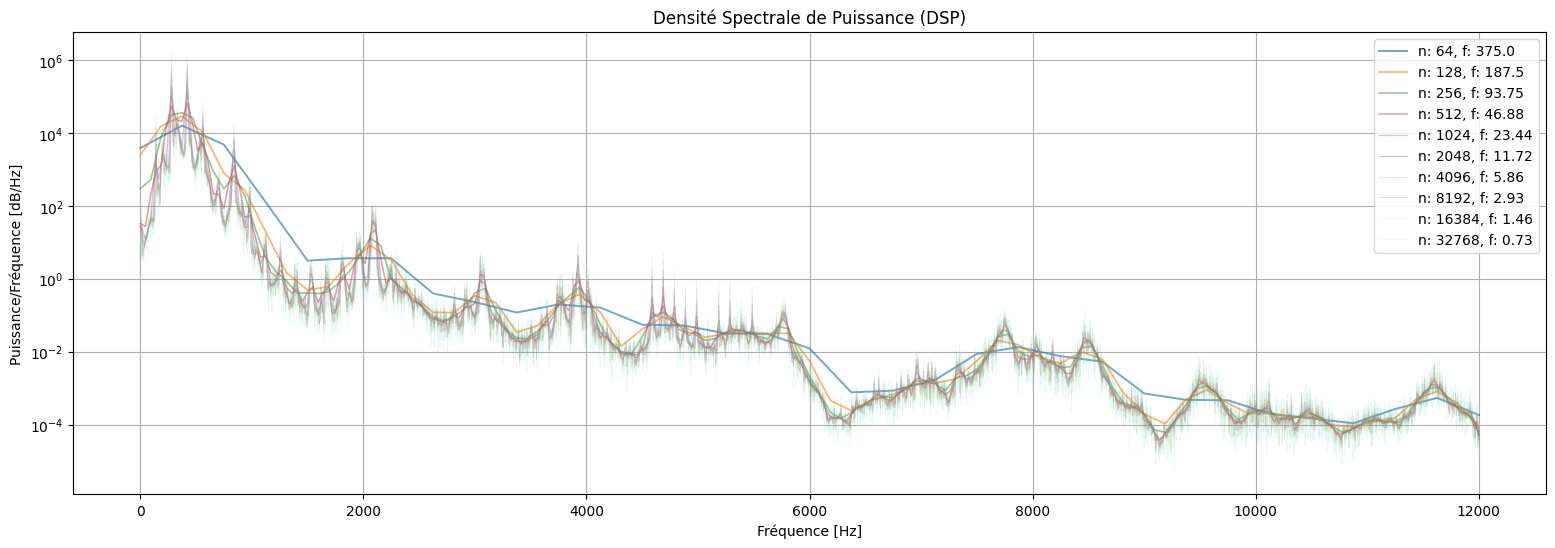

In [54]:
from scipy.signal import welch 

plt.figure(figsize=(19, 6))

for k in range(6,16, 1):

    frequencies, psd = welch(data, rate, nperseg=2**k) # On fait varier la taille de l'échantillon
                                                       # en puissance de 2.
    plt.semilogy(frequencies, psd, alpha=(1-0.06*k), linewidth=(2-0.1*k), label=f"n: {2**k}, f: {round(rate/2**k, 2)}")
    # n désigne la taille de l'échantillon et f la résolution en fréquence

plt.title('Densité Spectrale de Puissance (DSP)')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Puissance/Fréquence [dB/Hz]')
plt.legend(loc='upper right')
plt.grid()
plt.show()


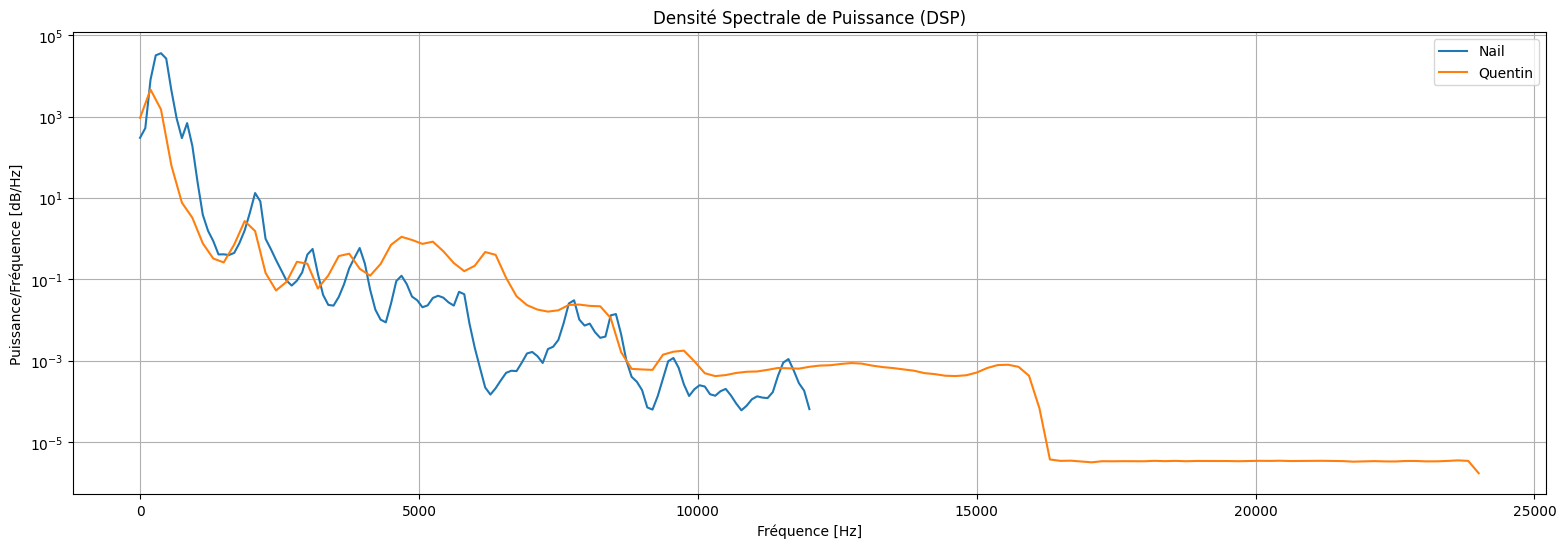

In [8]:
# On compare maintenant les enregistrements des 2 voix

plt.figure(figsize=(19, 6))
frequencies_q, psd_q = welch(data_q, rate_q, nperseg=256)
frequencies, psd = welch(data, rate, nperseg=256)
plt.semilogy(frequencies, psd, label=f"Nail")
plt.semilogy(frequencies_q[:len(frequencies)], psd_q[:len(psd)], label="Quentin")
plt.title('Densité Spectrale de Puissance (DSP)')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Puissance/Fréquence [dB/Hz]')
plt.legend(loc='upper right')
plt.grid()
plt.show()

On a tracer pour différentes valeurs n: Chaque valeur n correspond à la taille de chaque sous échantillon pour estimer la densité spectrale. En augmentant n, on diminue notre nombre d'échantillon mais on augmente notre précision, on fait donc un arbitrage biais variance. De plus, la résolution en fréquence dépends de n. Ici $\Delta f$ est égal à fréquence d'échantillonnage / n. En augmentant n, on augmente le nombre de points de la courbe mais on la rend "moins lisse".

On observe pas de pics particulier dans le tracé de la densité spectrale de puissance de notre signal. Ceci signifie Qu'il est difficile de discerner une fréquence dominante dans ce signal. Cette densité spectrale de puissance ne nous est pas très informative. On voit cependant que la puissance diminue rapidement et est très faible au delà de 4K hz.

De plus, on voit que la fréquence d'échantillonnage du second signal (iphone) étant plus élevé ($\approx$ 48k hz), la densité spectrale de puissance s'étends "plus loin" allant jusqu'à 24000 ce qui confirme la [fréquence de Nyquist](https://fr.wikipedia.org/wiki/Fr%C3%A9quence_de_Nyquist). 

## **Question 3**:
### - Calculez et affichez le spectrogramme du signal.
### - Justifiez du choix des réglages que vous avez faits.
### - Sélectionnez une portion pertinente du spectrogramme pour estimer visuellement le pitch de votre voix.


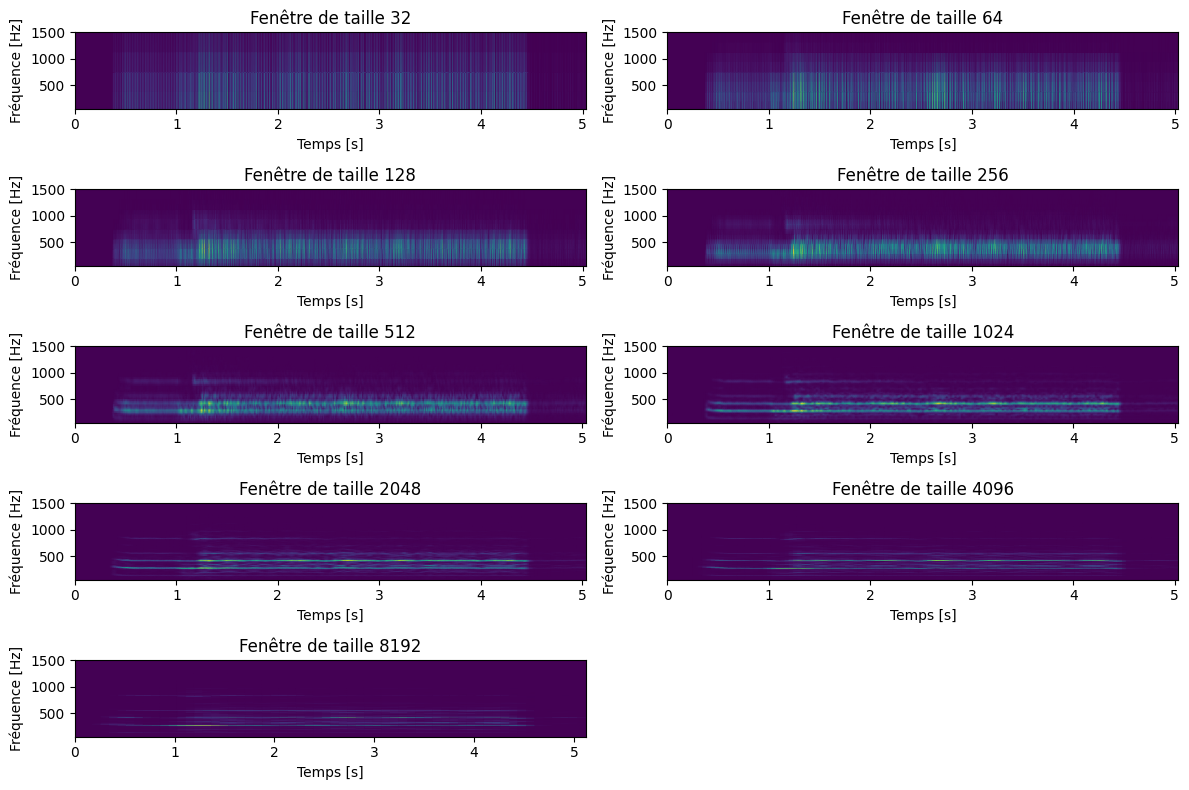

In [9]:
from scipy.signal import stft 

list_k = [2**k for k in range(5,14)]

n_plots = len(list_k)
ncols = 2 
nrows = (n_plots + 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))

axes = axes.flatten()

for idx, k in enumerate(list_k):
    f, tfct, Zxx = stft(data, 
                        fs=rate, 
                        nperseg=k, 
                        nfft=k, 
                        noverlap=k//2, 
                        window='hamming')

    ax = axes[idx]
    pcm = ax.pcolormesh(tfct, f, np.abs(Zxx), shading='gouraud', cmap='viridis')
    ax.set_title(f'Fenêtre de taille {k}')
    ax.set_ylabel('Fréquence [Hz]')
    ax.set_xlabel('Temps [s]')
    ax.set_ylim(50, 1500)


if len(list_k) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()

plt.show()

Le graphique avec pour taille de fenêtre 1024 semble le plus adapté on peut donc le tracer en plus grand pour y voir plus clair.

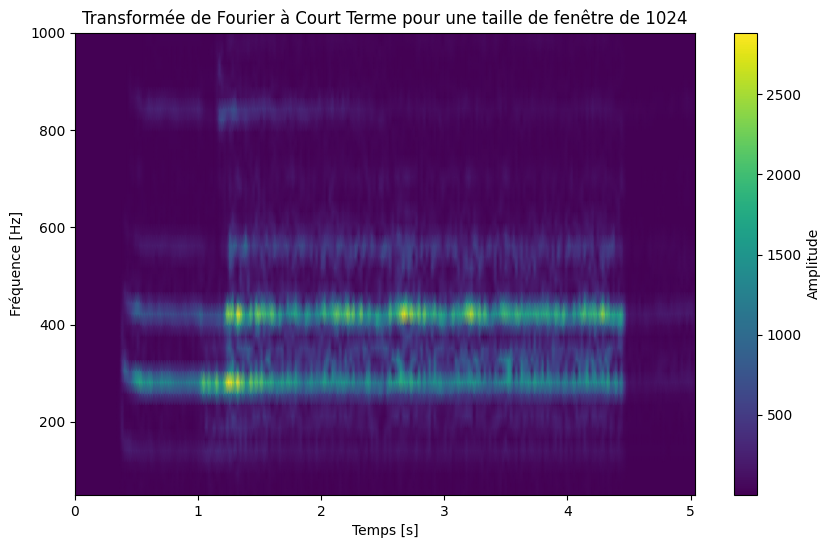

In [55]:
k = 1024
f, tfct, Zxx = stft(data, 
            fs=rate, 
            nperseg=k, 
            nfft=k, 
            noverlap = k//2, 
            window= 'hamming')

plt.figure(figsize=(10, 6))
plt.pcolormesh(tfct, f, np.abs(Zxx), shading='gouraud', cmap='viridis')
plt.colorbar(label='Amplitude')
plt.title(f'Transformée de Fourier à Court Terme pour une taille de fenêtre de {k}')
plt.ylabel('Fréquence [Hz]')
plt.xlabel('Temps [s]')
plt.ylim(50, 1000)
plt.show()

On voit qu'ici on peut difficilement distinguer une fréquence dominante qui pourrait s'apparenter à celle de la voix.

Pour estimer visuellement le pitch (hauteur) de ta voix à partir d'un spectrogramme, il faut choisir une portion pertinente du signal où les fréquences fondamentales de la voix sont bien visibles et les harmoniques sont suffisamment distinctes. Il est important de choisir une portion du signal qui représente un segment stable de la voix, par exemple, un moment où une note est tenue ou où la voix est stable, sans trop de fluctuations.

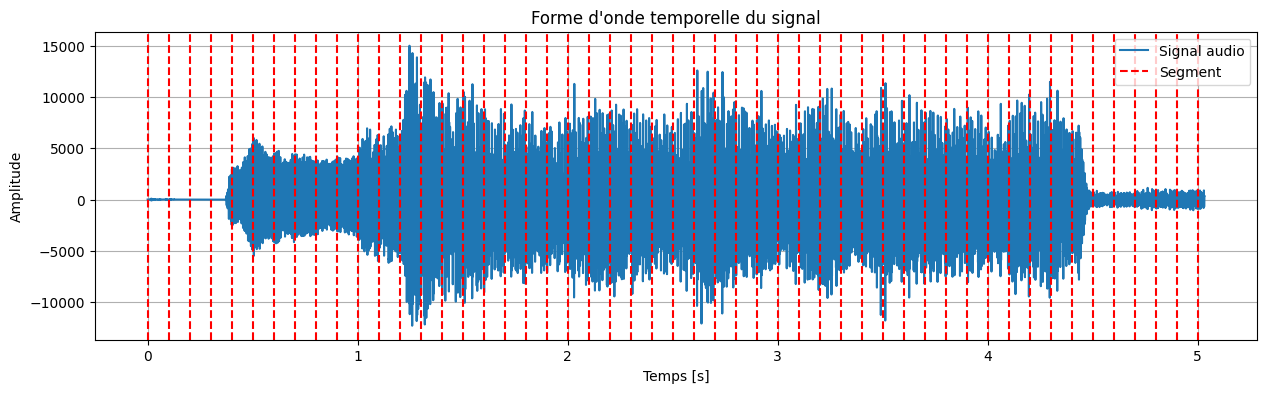

In [56]:
import numpy as np
import matplotlib.pyplot as plt

segment_duration = 0.1
segment_times = np.arange(0, duration, segment_duration)

plt.figure(figsize=(15, 4))
plt.plot(time, data, label="Signal audio")
plt.xlabel("Temps [s]")
plt.ylabel("Amplitude")
plt.title("Forme d'onde temporelle du signal")

for segment_time in segment_times:
    plt.axvline(x=segment_time, color='red', linestyle='--', label='Segment' if segment_time == 0 else "")

plt.legend()
plt.grid()
plt.show()


Visuellement, on voit qu'entre le 7e et le 8e baton, on capte un signal assez stationnaire et d'amplitude modérée. On se concentre sur celui-là

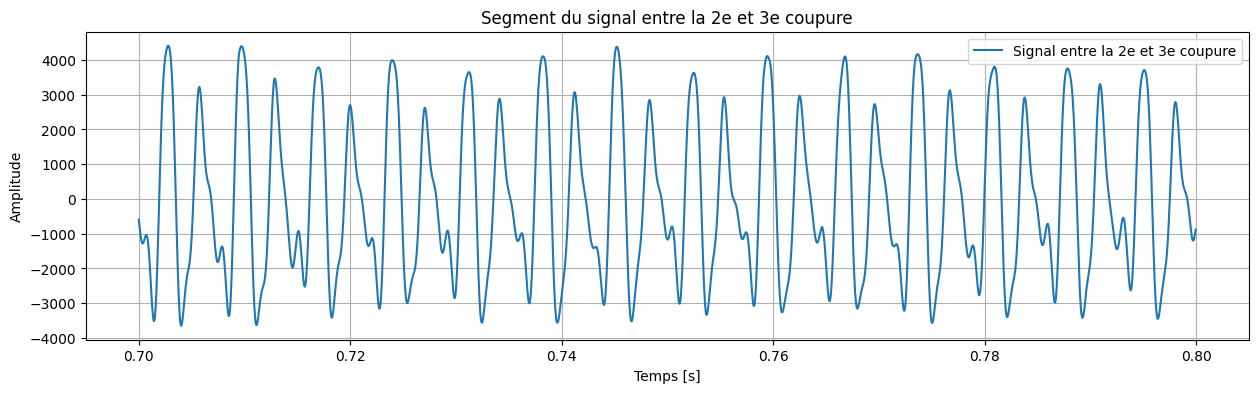

In [12]:
segment_samples = segment_duration * rate 

start_index = int(7 * segment_samples)
end_index = int(8 * segment_samples)

segment_data = data[start_index:end_index]
segment_time = time[start_index:end_index]

plt.figure(figsize=(15, 4))
plt.plot(segment_time, segment_data, label="Signal entre la 2e et 3e coupure")
plt.xlabel("Temps [s]")
plt.ylabel("Amplitude")
plt.title("Segment du signal entre la 2e et 3e coupure")
plt.legend()
plt.grid()
plt.show()

On estime ensuite la densité spectrale sur cette portion de signal 

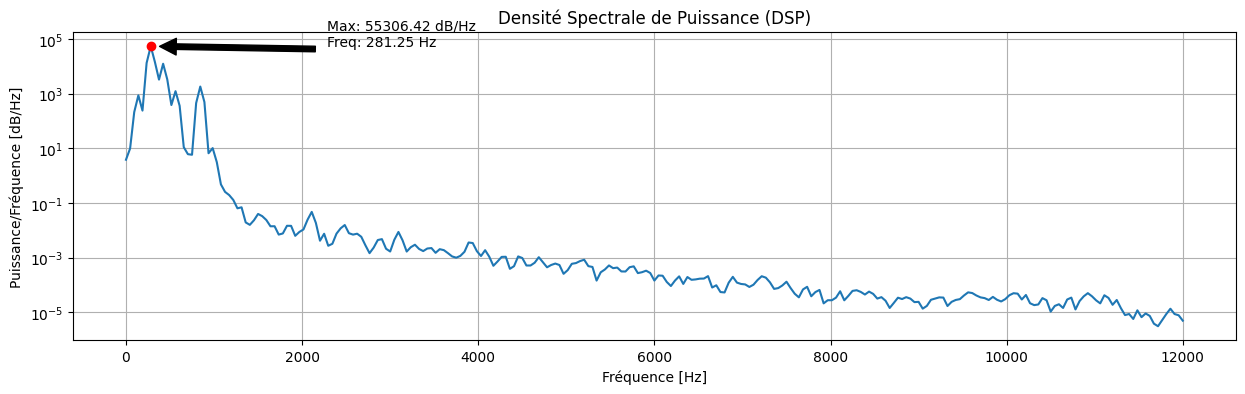

In [13]:
frequencies_seg, psd_seg = welch(segment_data, rate, nperseg=512)

plt.figure(figsize=(15, 4))
plt.semilogy(frequencies_seg, psd_seg)
plt.title('Densité Spectrale de Puissance (DSP)')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Puissance/Fréquence [dB/Hz]')
plt.grid()

max_index = np.argmax(psd_seg)
max_value = psd_seg[max_index]
max_frequency = frequencies_seg[max_index]

plt.plot(max_frequency, max_value, 'ro')
plt.annotate(f'Max: {max_value:.2f} dB/Hz\nFreq: {max_frequency:.2f} Hz',
             xy=(max_frequency, max_value), 
             xytext=(max_frequency + 2000, max_value),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

Une autre méthode est d'utiliser le spectrogramme et de voir si une fréquence se démarque des autres.

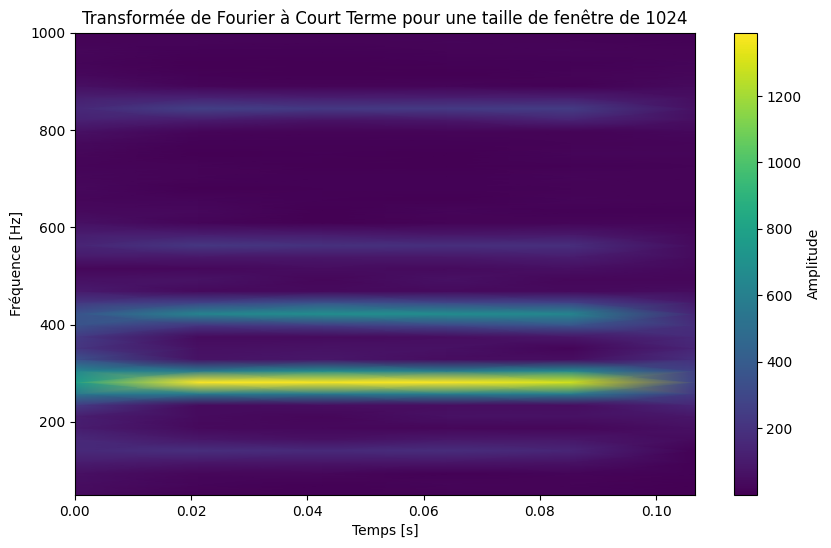

In [14]:
k = 1024
f, tfct, Zxx = stft(segment_data, 
            fs=rate, 
            nperseg=k, 
            nfft=k, 
            noverlap = k//2, 
            window= 'hamming')

plt.figure(figsize=(10, 6))
plt.pcolormesh(tfct, f, np.abs(Zxx), shading='gouraud', cmap='viridis')
plt.colorbar(label='Amplitude')
plt.title(f'Transformée de Fourier à Court Terme pour une taille de fenêtre de {k}')
plt.ylabel('Fréquence [Hz]')
plt.xlabel('Temps [s]')
plt.ylim(50, 1000)
plt.show()

Ici on voit un pitch situé aux alentours de 300 Hz, ce qui est plutôt élevé pour une voix masculine; L'enregistrement comportant pas mal de grésillement, il se peut que cela joue un rôle dans le pitch.

## **Question 4 - Calcul du Pitch**:
### - Proposez une méthode simple pour estimer automatiquement le Pitch de votre voix (cette méthode ne doit pas faire intervenir d'implémentations externes).
### - Ne pas utiliser de méthode "toute faite" que vous pourriez par exemple trouver dans la bibliothèque librosa.

### - Commentez vos résultats.



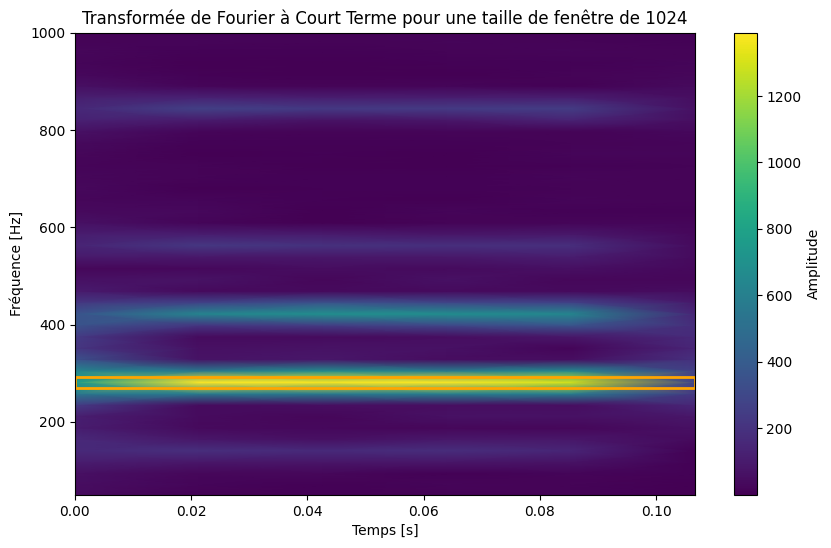

Max Pitch @ 281.25


In [15]:
import matplotlib.patches as patches


def find_dominant_frequency_from_graph(data, rate, k=1024, verbose=False):
    """
    Trouve la fréquence ayant la moyenne d'amplitudes la plus élevée dans la STFT.

    Paramètres :
    - data : les données (array 1d)
    - rate : la fréquence
    - k : la taille de la fenêtre
    - verbose : afficher (ou non) le spectrogram

    Retour :
    - dominant_frequency : fréquence ayant la moyenne d'amplitude la plus élevée
    """
    f, tfct, Zxx = stft(segment_data, 
                fs=rate, 
                nperseg=k, 
                nfft=k, 
                noverlap = k//2, 
                window= 'hamming')
    Zxx = np.abs(Zxx)

    mean_amplitudes = np.mean(Zxx, axis=1)

    dominant_index = np.argmax(mean_amplitudes)

    dominant_frequency = f[dominant_index]
    
    if verbose:
        plt.figure(figsize=(10, 6))
        plt.pcolormesh(tfct, f, np.abs(Zxx), shading='gouraud', cmap='viridis')
        current_axis = plt.gca()

        rect_height = f[1] - f[0]
        rect_width = tfct[-1] - tfct[0]
        rect = patches.Rectangle((tfct[0], f[dominant_index] - rect_height / 2),
                                 rect_width,
                                 rect_height,
                                 linewidth=2, edgecolor='orange', facecolor='none')
        current_axis.add_patch(rect)
        plt.colorbar(label='Amplitude')
        plt.title(f'Transformée de Fourier à Court Terme pour une taille de fenêtre de {k}')
        plt.ylabel('Fréquence [Hz]')
        plt.xlabel('Temps [s]')
        plt.ylim(50, 1000)
        plt.show()
        print(f"Max Pitch @ {dominant_frequency}")     
    return float(dominant_frequency)

_ = find_dominant_frequency_from_graph(data, rate, verbose=True)

La "méthode simple" ici est de simplement regarder à partir du spectrogramme quelle "ligne" (qui correspond à une fréquence) possède l'amplitude la plus élevée en moyenne. Ici on a pris un échantillon de la voix où celle ci varie très peu donc la méthode donne des résultats cohérents avec l'analyse visuelle du spectrogramme. Cependant, cette méthode très simple ne doit pas pouvoir marcher "partout". par exemple si on l'utilise sur le 2e enregistrement sans sélectionner un sample pertinent, on a des résultats non vraisemblables (un pitch aux alentours de 600hz pour une voix d'homme est peu vraisemblable).

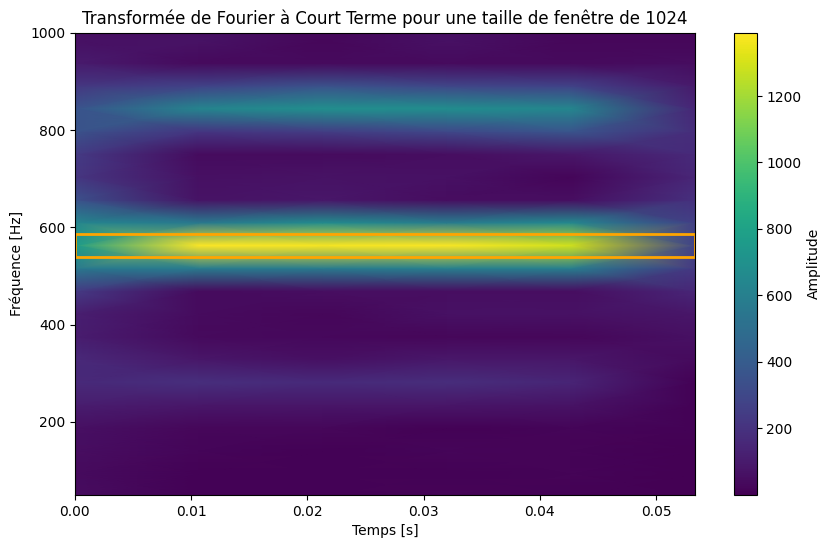

Max Pitch @ 562.5


In [16]:
_ = find_dominant_frequency_from_graph(data_q, rate_q, verbose=True)

## <div class=consignes>Partie 2: Détection d'impulsion </div>

<div class=consignes> Un signal de durée 1 seconde et échantillonné à 1000 Hz est composé d'un bruit blanc gaussien de puissance inconnue et éventuellement d'une impulsion à une fréquence f0 comprise entre 100 et 200 Hz. 
<br><br>
Une série de 1000 signaux est enregistrée dans le fichier signaux_impulsions.npz. 
Ouvez ce fichier avec numpy (cf code plus bas). Le fichier contient une tableau signaux 10000 x 1000 dont chaque ligne contient un signal de durée 1000. Le fichiez contient aussi un tableau labels de taille 10000 dont la ligne i est à TRUE si le signal i contient une impulsion et à 0 sinon. 

</div>

In [17]:
donnees = np.load('signaux_impulsions.npz')
signaux = donnees['data']
labels = donnees['labels']

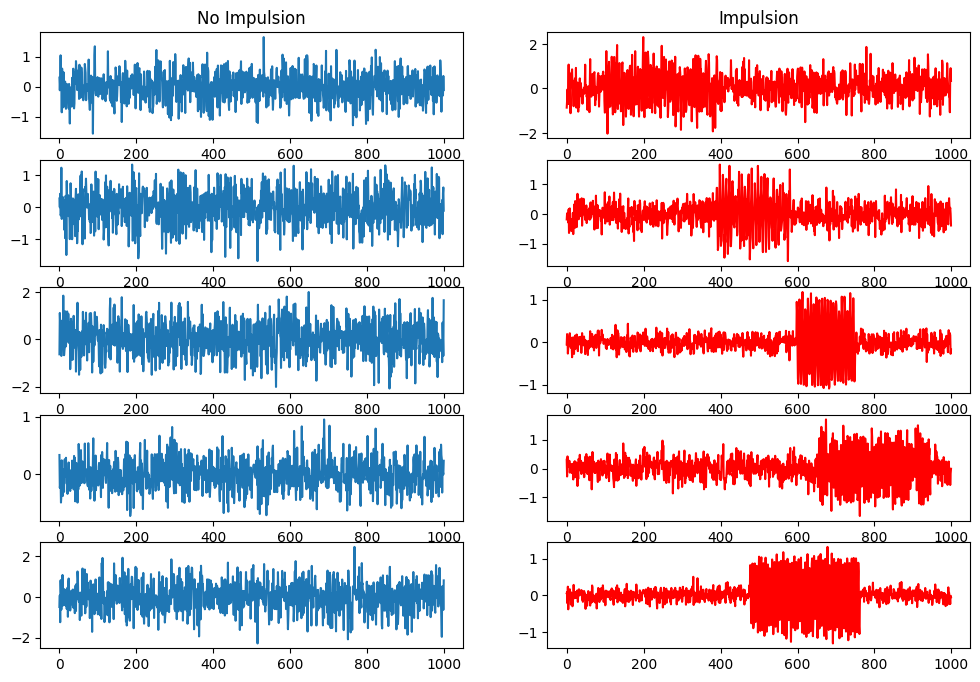

In [18]:
index_1 = np.where(labels == 1)[0]  # Liste des index des signaux avec impulsions
index_0 = np.where(labels == 0)[0]  # Liste des index des signaux sans impulsions

n_plots=10
n_cols = 2
nrows = (n_plots + 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))

axes = axes.flatten()


for i in range(n_plots):
    ax = axes[i]
    if i%2 == 0:
        ax.plot(signaux[index_0[i]])
    else:
        ax.plot(signaux[index_1[i]], c="r")
    
    if i==0:
        ax.set_title(f'No Impulsion')
    if i ==1:
        ax.set_title("Impulsion")

## <div class=consignes> Première méthode </div>

<div class=consignes> Proposez une méthode simple  pour décider si un signal contient une impulsion ou non à partir du calcul de l'énergie du signal. Cette méthode fera intervenir un seuil: 
</div>

```python
def contient_impulsion_energie(signal: np.ndarray, seuil: float) -> bool:
```

In [19]:
def contient_impulsion_energie(signal, seuil):
    "On approxime l'énergie par la somme des valeurs au carré"
    energie = (signal**2).sum()
    return True if energie > seuil else False

contient_impulsion_energie(signaux[1], 10)

True

<div class=consignes>
Utilisez votre méthode avec un seuil fixé sur tous les signaux pour prédire s'ils contiennent une impulsion ou non. 
</div>

In [33]:
def calcul_seuil_optimal(data, labels, score_function, **hyp):
    """
    Calcule le seuil optimal qui maximise l'accuracy' et renvoie TP, FP, TN, FN.
    La fonction est générale et prends en entrée des données, les labels ainsi que la fonction de 
    scoring. On peut aussi rajouter des hyperparamètres propres à la fonction dans **hyp

    Paramètres :
    - data : array (n_données, L), le jeu de données.
    - labels : array (n_données, ), les étiquettes binaires (0 ou 1).
    - score_function : une fonction qui prend le jeu de données en entrée et retourne un score.

    Retour :
    - seuil_optimal : le seuil qui maximise le F1-score.
    - TP : nombre de vrais positifs
    - FP : nombre de faux positifs
    - TN : nombre de vrais négatifs
    - FN : nombre de faux négatifs
    """

    scores = score_function(data, **hyp)

    seuils_possibles = np.sort(scores)
    
    best_acc = 0
    seuil_optimal = seuils_possibles[0]
    meilleur_TP, meilleur_FP, meilleur_TN, meilleur_FN = 0, 0, 0, 0

    for seuil in seuils_possibles:

        predictions = (scores >= seuil).astype(int)

        TP = np.sum((predictions == 1) & (labels == 1))
        FP = np.sum((predictions == 1) & (labels == 0))
        TN = np.sum((predictions == 0) & (labels == 0))
        FN = np.sum((predictions == 0) & (labels == 1))

        acc = TP + TN

        if acc > best_acc:
            best_acc = acc
            seuil_optimal = seuil
            meilleur_TP, meilleur_FP, meilleur_TN, meilleur_FN = TP, FP, TN, FN

    list_out = [seuil_optimal, meilleur_TP, meilleur_FP, meilleur_TN, meilleur_FN]

    out = tuple([int(x) for x in list_out])
    dic_out = {"Seuil": out[0], "TP": out[1], "FP": out[2], "TN": out[3], "FN": out[4]}
    return dic_out

def return_energie(signal):
    return (signaux**2).sum(axis=1)

In [34]:
calcul_seuil_optimal(signaux, labels, return_energie)

{'Seuil': 110, 'TP': 4494, 'FP': 3082, 'TN': 1914, 'FN': 510}

<div class=consignes>
Calculez: <br>
- VP = le nombre de signaux que vous détectez comme contenant une impulsion qui contiennet effectivement une impulsion <br>
- FP = le nombre de signaux que vous détectez comme contenant une impulsion qui ne contiennet en fait PAS une impulsion <br>
- VN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion qui ne contiennet effectivement PAS une impulsion<br>
- FN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion mais qui  contiennet en fait une impulsion
</div>

## <div class=consignes>Deuxième méthode </div>

<div class=consignes>Proposez une deuxième méthode faisant par exemple intervenir le spectrogramme du signal. Cette méthode fera encore intervenir un seuil
</div>

```python
def contient_impulsion_spectrogramme(signal: np.ndarray, seuil: float) -> bool:
```


Première étape, analyse visuelle !
Ici on trace différents spectrogramme pour d'abord voir si le spectrogramme nous sera vraiment utile

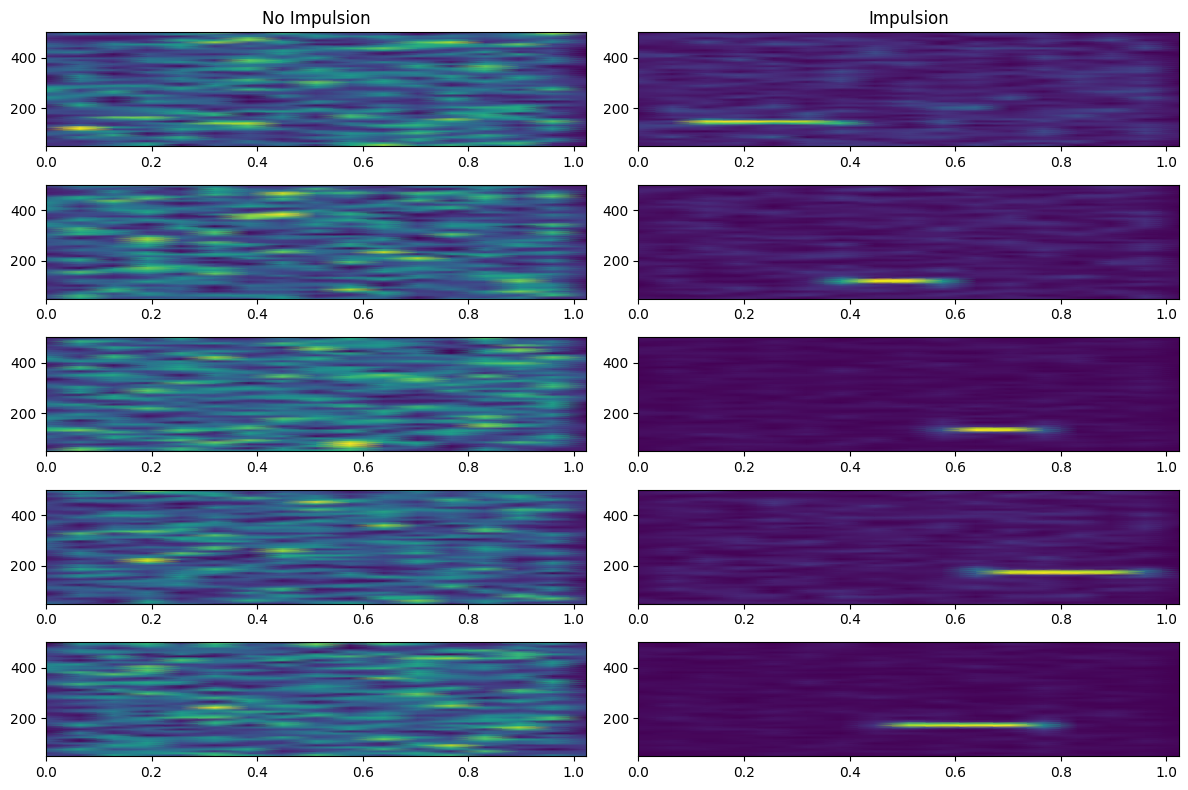

In [35]:
n_plots = 10
n_cols = 2
nrows = (n_plots + 1) // ncols
k = 128
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))

axes = axes.flatten()


for i in range(n_plots):
    if i%2 == 0:
        data_temp = signaux[index_0[i]]
    else:
        data_temp = signaux[index_1[i]]
    f, tfct, Zxx = stft(data_temp,
                        fs=1000, 
                        nperseg=k, 
                        nfft=k, 
                        noverlap=k//2, 
                        window='hamming')

    ax = axes[i]
    pcm = ax.pcolormesh(tfct, f, np.abs(Zxx), shading='gouraud', cmap='viridis')
    ax.set_ylim(50, 500)
    if i==0:
        ax.set_title(f'No Impulsion')
    if i ==1:
        ax.set_title("Impulsion")
plt.tight_layout()

On remarque que les spectrogrammes permettent facilement de différentier (à simplement visuellement) les données avec impulsions et sans impulsions. On s'attends à ce qu'une méthode qui utilise un spectrogramme ait de meilleurs résultats

In [23]:
from scipy.signal import convolve2d

def get_kernel_score(data, k=128, l=10, L=10, n_max=2):
    scores = []
    kernel = np.ones((l, L))
    for signal in data:
        f, tfct, Zxx = stft(signal,
                    fs=1000, 
                    nperseg=k, 
                    nfft=k, 
                    noverlap=k//2, 
                    window='hamming')
        sliding_window_sum = convolve2d(np.abs(Zxx), kernel, mode='same')

        scores.append(float(np.sort(sliding_window_sum.flatten())[-n_max:].sum()))

    return np.array(scores)

In [45]:
calcul_seuil_optimal(signaux, labels, get_kernel_score, **{"k": 128, "l":1, "L":5})

{'Seuil': 1, 'TP': 4659, 'FP': 16, 'TN': 4980, 'FN': 345}

Ici la méthode consiste simplement a appliquer une opération de convolution de taille $l * L$ sur le spectrogramme qui fait la somme des valeurs de la sous fenêtre. On prends ensuite la somme des ``n_max`` fenêtres maximum

<div class=consignes> Calculez pour cette nouvelle méthode, pour un certain seuil les valeurs de VP, FP, VN, FN </div>

## <div class=consignes> Comparaison des méthodes </sdivs>

<div class=consignes>Pour une méthode de détection et un seuil donné, la précision est définie comme: 
$$ \frac{\sharp\text{Signaux détectés comme contenant une impulsion qui en contiennent effectivement une}}{\sharp\text{Signaux détectés comme positifs }}$
et le rappel comme:
$$ \frac{\sharp\text{Signaux détectés comme contenant une impulsion qui en contiennent effectivement une}}{\sharp \text{Signaux contenant une impulsions}} $$
    
</div>

<div class=consignes> Donnez une interprétation de ces deux métriques </div>

Avec la précision on veut approximer P(X=1 | F(X)=1) (pour la précision) et P(F(X)=1 | X=1) (en notant F(X) l'output du modèle, donc F(X) $\in$ {0, 1}).

Une interprétation simple est que la précision nous renseigne en moyenne quel est le taux de bonne prédiction parmis ses prédictions en 1, et le rappel quel est le taux de 1 qu'il a détecté. 

Ces métriques peuvent être particulièrement importantes selon l'enjeux du modèle. Par exemple, il peut être plus coûteux de ne pas détecter un fraudeur que d'avoir un modèle qui en détecte "trop". On peut ainsi faire un arbitrage entre la précision et le rappel en faisant varier le seuil. Un seuil faible aura tendance à favoriser le rappel au détriment de la précision et inversement pour un seuil élevé.

<div class=consignes>
    Pour chacune des deux méthodes proposées, faites varier le seuil sur une dizaine de valeurs et calculez la précision et le rappel pour chacun de ces seuils. 

Affichez dans le plan (précision , rappel) les points de fonctionnement des deux méthodes pour différents seuils. <br>Commentez le résultat. 
    </div>

La première fonction que nous avons fait calculais déjà un seuil automatiquement en maximisant l'accuracy du model. On peut légèrement modifier la fonction pour que celle ci ne renvoi que les scores en fonction du seuil.

In [46]:
def calcul_scores_for_thresh(data, labels, score_function, **hyp):
    """
    Calcule le seuil optimal qui maximise l'accuracy' et renvoie TP, FP, TN, FN.

    Paramètres :
    - data : array (n_données, L), le jeu de données.
    - labels : array (n_données, ), les étiquettes binaires (0 ou 1).
    - score_function : une fonction qui prend le jeu de données en entrée et retourne un score.

    Retour :
    - seuil_optimal : le seuil qui maximise le F1-score.
    - TP : nombre de vrais positifs
    - FP : nombre de faux positifs
    - TN : nombre de vrais négatifs
    - FN : nombre de faux négatifs
    """

    scores = score_function(data, **hyp)

    dic_seuils = {}

    seuils_possibles = np.sort(scores)
    
    best_acc = 0
    seuil_optimal = seuils_possibles[0]
    meilleur_TP, meilleur_FP, meilleur_TN, meilleur_FN = 0, 0, 0, 0

    for seuil in seuils_possibles:

        predictions = (scores >= seuil).astype(int)

        TP = np.sum((predictions == 1) & (labels == 1))
        FP = np.sum((predictions == 1) & (labels == 0))
        TN = np.sum((predictions == 0) & (labels == 0))
        FN = np.sum((predictions == 0) & (labels == 1))

        acc = TP + TN
        temp_dic = {"Precision": float(TP/(TP+FP)),
                    "Rappel": float(TP/(TP+FN))}
        
        dic_seuils[float(seuil)] = temp_dic
    return dic_seuils

In [77]:
out_1 = calcul_scores_for_thresh(signaux, labels, return_energie)
out_2 = calcul_scores_for_thresh(signaux, labels, get_kernel_score, **{"k": 128, "l":1, "L":1, "n_max":1})

In [49]:
def precision_recall_curve(dic, title='Resultats modèle energie'):
    precisions = [dic[seuil]['Precision'] for seuil in dic]
    rappels = [dic[seuil]['Rappel'] for seuil in dic]

    plt.figure(figsize=(8, 6))

    plt.plot(precisions, rappels, label='Courbe Précision-Rappel', color='b', linestyle='-')

    plt.xlabel('Précision')
    plt.ylabel('Rappel')
    plt.title(title)

    plt.grid(True)
    plt.show()

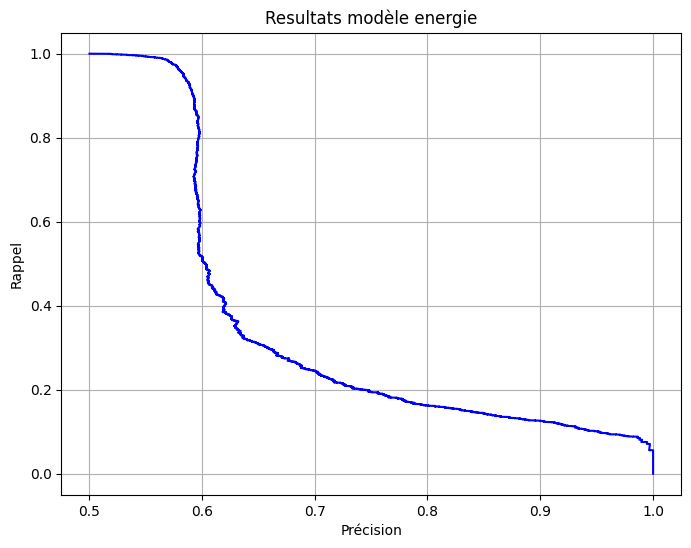

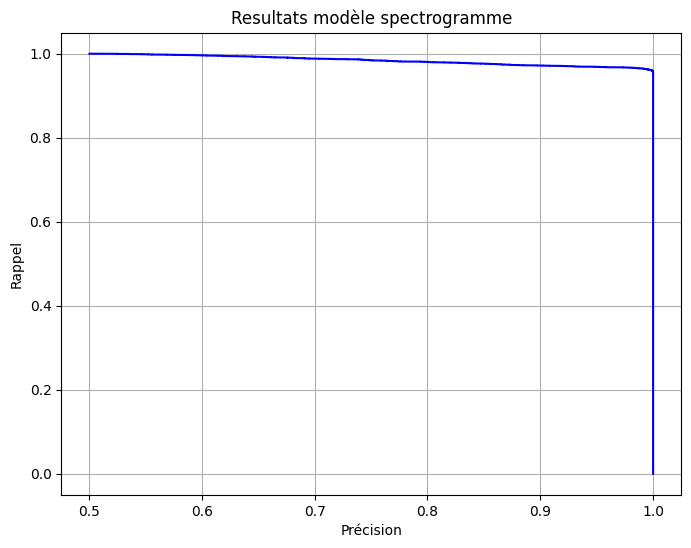

In [78]:
precision_recall_curve(out_1)
precision_recall_curve(out_2, title="Resultats modèle spectrogramme")

On voit clairement que la méthode utilisant le spectrogramme, bien que très simpliste surperforme largement la méthode qui utilise l'energie comme critère de classifications. De plus on voit qu'avec de simples paramètres (non optimisés) on atteint un score très élevé. Une méthode plus approfondie devrait avoir des résultats encore plus importants. A vrai dire même la méthode "kernel" se fait surpasser par la méthode de simplement prendre le maximum au sein du spectrogramme.